In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from matplotlib.pyplot import cm 

data = pd.read_csv("carsdata_features.csv", engine='c')

In [2]:
data.head()

,NO_ABS,NO_accoudoir_central,NO_airbag_conducteur,NO_airbag_lateraux,NO_airbag_passager,NO_airbag_tete_rideau,alesage_mm,course_piston_mm,NO_allumage_auto_feux,NO_antipatinage,...,vitesse_max,NO_vitres_electriques,NO_vitres_teintees,voie_arriere,voie_avant,NO_volant_cuir,NO_volant_reglable,volume_coffre_min,volume_coffre_max,zero_100
0,0,1,0,0,0,0,86.0,86.00,1,0,...,220.0,0,0,1479.0,1462.0,0,0,150.0,1700.0,8.2
1,0,1,0,0,0,1,72.2,73.10,1,0,...,175.0,0,0,1476.0,1493.0,1,0,320.0,1200.0,11.1
2,0,0,0,0,0,1,89.9,100.00,1,0,...,176.0,0,0,1530.0,1530.0,0,0,410.0,1841.0,11.1
3,0,1,0,0,0,1,NaN,NaN,0,0,...,135.0,0,0,1510.0,1511.0,0,0,338.0,1225.0,13.5
4,0,0,0,0,0,0,77.0,85.44,0,0,...,180.0,0,0,1551.0,1547.0,0,0,440.0,1486.0,11.5


## Prépartion des données

les modèles de voitures sont disponible dans plusieur colones. On va les rassembler dans une matice finale sous une forme `one hot encoding`.

In [3]:
car_classes = ["bus","cabriolet","coupe","hatchback","mpv","pickup","sedan","stationwagon","suv_crossover"]

In [4]:
car_classes.sort()

In [5]:
car_classes

['bus',
 'cabriolet',
 'coupe',
 'hatchback',
 'mpv',
 'pickup',
 'sedan',
 'stationwagon',
 'suv_crossover']

In [6]:
data.loc[:5,car_classes]

,bus,cabriolet,coupe,hatchback,mpv,pickup,sedan,stationwagon,suv_crossover
0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0


In [7]:
raw_target = data.loc[:,car_classes]

In [8]:
target = raw_target.as_matrix().astype('float32')

In [9]:
target.shape

(64553, 9)

In [139]:
#unbalanced
target.sum(axis=0)

array([   732.,   2106.,   2554.,  21424.,   5972.,     76.,  13211.,
        12517.,   5036.], dtype=float32)

## Sélection des données

In [10]:
pd.set_option('display.max_rows',200)

In [11]:
data.loc[0, ~ data.columns.isin(car_classes)]

NO_ABS                                                        0
NO_accoudoir_central                                          1
NO_airbag_conducteur                                          0
NO_airbag_lateraux                                            0
NO_airbag_passager                                            0
NO_airbag_tete_rideau                                         0
alesage_mm                                                   86
course_piston_mm                                             86
NO_allumage_auto_feux                                         1
NO_antipatinage                                               0
NO_appuis_tete_arriere                                        0
NO_assistant_freinage                                         1
NO_banquette_arriere_rabattable                               0
NO_blocage_differentiel                                       1
NO_bluetooth                                                  1
capacite_charge_max_kg                  

les colonnes à exclure:
* marque
* mmodele
* version
* date_fin
* date_sortie


In [12]:
excluded_cols = ["marque","modele","version","date_fin","date_sortie"]

In [13]:
excluded_cols = excluded_cols + car_classes

In [14]:
selected_data = data.loc[:, ~ data.columns.isin(excluded_cols)]

In [15]:
selected_data.describe()

,NO_ABS,NO_accoudoir_central,NO_airbag_conducteur,NO_airbag_lateraux,NO_airbag_passager,NO_airbag_tete_rideau,alesage_mm,course_piston_mm,NO_allumage_auto_feux,NO_antipatinage,...,vitesse_max,NO_vitres_electriques,NO_vitres_teintees,voie_arriere,voie_avant,NO_volant_cuir,NO_volant_reglable,volume_coffre_min,volume_coffre_max,zero_100
count,64553.000000,64553.000000,64553.000000,64553.000000,64553.000000,64553.000000,63116.000000,63116.000000,64553.000000,64553.000000,...,63142.000000,64553.000000,64553.000000,63883.000000,63883.000000,64553.000000,64553.000000,63601.000000,50167.000000,62103.000000
mean,0.113023,0.356947,0.114789,0.209254,0.135749,0.338962,80.893947,85.447940,0.626555,0.374498,...,196.260381,0.120723,0.066736,1504.042500,1508.237058,0.373166,0.153316,458.788635,1335.996532,10.913672
std,0.316624,0.479103,0.318770,0.406780,0.342524,0.473361,5.256816,7.126757,0.483723,0.483997,...,26.773986,0.325807,0.249566,70.235166,67.984290,0.483649,0.360295,456.495450,489.411897,2.854191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,55.000000,0.000000,0.000000,...,80.000000,0.000000,0.000000,1080.000000,140.000000,0.000000,0.000000,31.000000,145.000000,2.700000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000,80.500000,0.000000,0.000000,...,177.000000,0.000000,0.000000,1461.000000,1465.000000,0.000000,0.000000,335.000000,1032.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,86.000000,1.000000,0.000000,...,194.000000,0.000000,0.000000,1513.000000,1518.000000,0.000000,0.000000,435.000000,1283.000000,10.800000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,84.000000,90.400000,1.000000,1.000000,...,213.000000,0.000000,0.000000,1551.000000,1549.000000,1.000000,0.000000,500.000000,1584.000000,12.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,104.800000,105.700000,1.000000,1.000000,...,330.000000,1.000000,1.000000,1790.000000,1810.000000,1.000000,1.000000,10800.000000,4650.000000,35.000000


In [19]:
# séparation des variables binaires et continues 
cont_data = selected_data.loc[:,selected_data.apply(max) > 1.0]

In [20]:
bin_data = selected_data.loc[:, selected_data.apply(max) <= 1.0]

## Correction des valeurs manquantes

In [23]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(cont_data.as_matrix().astype('float32'))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [25]:
cont_mat = imp.transform(cont_data.as_matrix().astype('float32'))

In [26]:
cont_mat.shape

(64553, 57)

## mise à l'échelle des variables categorielles

In [54]:
bin_data.head()

,NO_ABS,NO_accoudoir_central,NO_airbag_conducteur,NO_airbag_lateraux,NO_airbag_passager,NO_airbag_tete_rideau,NO_allumage_auto_feux,NO_antipatinage,NO_appuis_tete_arriere,NO_assistant_freinage,...,turbocharger_w_intercooler,electromagnetic_synchronous_motor,valvetrain_ohc,valvetrain_ohv,permanent_magnet_synchronous_motor,NO_verre_intim_arriere,NO_vitres_electriques,NO_vitres_teintees,NO_volant_cuir,NO_volant_reglable
0,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,1,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
bin_data.replace(to_replace=0, value=-1).head()

,NO_ABS,NO_accoudoir_central,NO_airbag_conducteur,NO_airbag_lateraux,NO_airbag_passager,NO_airbag_tete_rideau,NO_allumage_auto_feux,NO_antipatinage,NO_appuis_tete_arriere,NO_assistant_freinage,...,turbocharger_w_intercooler,electromagnetic_synchronous_motor,valvetrain_ohc,valvetrain_ohv,permanent_magnet_synchronous_motor,NO_verre_intim_arriere,NO_vitres_electriques,NO_vitres_teintees,NO_volant_cuir,NO_volant_reglable
0,-1,1,-1,-1,-1,-1,1,-1,-1,1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
1,-1,1,-1,-1,-1,1,1,-1,-1,1,...,1,-1,-1,-1,-1,1,-1,-1,1,-1
2,-1,-1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
3,-1,1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [57]:
bin_data.replace(to_replace=0, value=-1, inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
bin_mat = bin_data.as_matrix().astype('float32')

In [59]:
bin_mat.shape

(64553, 117)

## Standardisation

In [29]:
from sklearn.preprocessing import scale
scaled_cont_mat = scale(cont_mat)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [31]:
import numpy as np
from scipy import stats

In [37]:
avant_scaling = stats.describe(cont_mat)

In [38]:
apres_scaling = stats.describe(scaled_cont_mat)

In [40]:
elements = range(1, len(avant_scaling.variance) + 1)

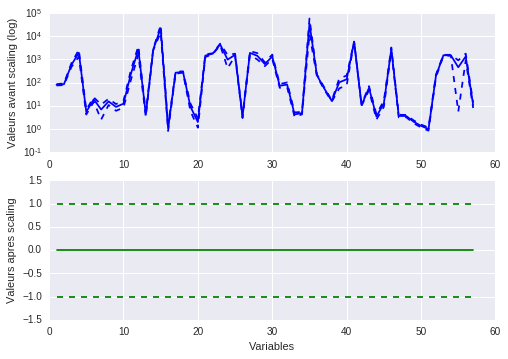

In [53]:
plt.subplot(211)
plt.plot(elements, avant_scaling.mean - np.sqrt(avant_scaling.variance), '--', color='blue')
plt.plot(elements, avant_scaling.mean + np.sqrt(avant_scaling.variance), '--', color='blue')
plt.plot(elements, avant_scaling.mean , '-', label="Avant scaling", color='blue')
plt.yscale('log')
plt.ylabel('Valeurs avant scaling (log)')

plt.subplot(212)
plt.plot(elements, apres_scaling.mean - np.sqrt(apres_scaling.variance), '--', color='green')
plt.plot(elements, apres_scaling.mean + np.sqrt(apres_scaling.variance), '--', color='green')
plt.plot(elements, apres_scaling.mean , '-', label="Apres scaling", color='green')
plt.ylabel('Valeurs apres scaling')
plt.xlabel('Variables')

plt.show()



In [60]:
var_cat = stats.describe(bin_mat)

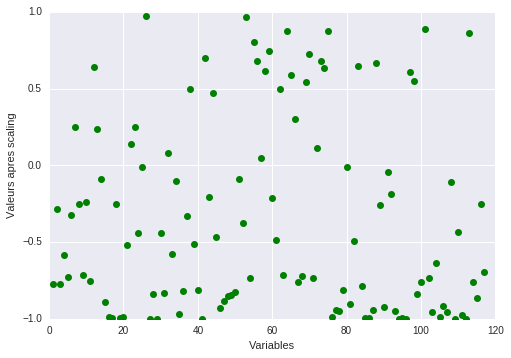

In [66]:
elements = range(1, len(var_cat.variance) + 1)

plt.plot(elements, var_cat.mean , 'o', label="Apres scaling", color='green')
plt.ylabel('Valeurs apres scaling')
plt.xlabel('Variables')

plt.show()

## Assemblage de la matrice

In [67]:
mat = np.hstack((bin_mat, cont_mat))

In [68]:
mat.shape

(64553, 174)

## Echantillonage des données

In [103]:
# test set 20%
mask = np.random.choice([False,True] , mat.shape[0], p=[0.8, 0.2])

In [112]:
test_data = mat[mask]
y_test = target[mask]
train_data = mat[np.invert(mask)]
y_train = target[np.invert(mask)]

In [113]:
# validation set 10 %
val_num = int(np.round(train_data.shape[0] * 0.1))
val_num

5153

In [114]:
val_data = train_data[:val_num]
y_val = target[:val_num]
train_data = train_data[val_num:]
y_train = y_train[val_num:]

In [115]:
train_data.shape

(46379, 174)

In [116]:
y_train.shape

(46379, 9)

In [117]:
val_data.shape

(5153, 174)

In [118]:
y_val.shape

(5153, 9)

## Echantillonage stratifié

In [140]:
from sklearn.model_selection import StratifiedShuffleSplit

In [141]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_index, test_index in sss.split(mat,target):
    X_train, X_test = mat[train_index], mat[test_index]
    y_train, y_test = target[train_index], target[test_index]

In [142]:
X_train.shape

(51642, 174)

In [143]:
y_train.shape

(51642, 9)

In [144]:
#validation set
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
for train_index, test_index in sss2.split(X_train, y_train):
    partial_X_train, X_val = X_train[train_index], X_train[test_index]
    partial_y_train, y_val = y_train[train_index], y_train[test_index]

In [145]:
partial_X_train.shape

(46477, 174)

In [146]:
partial_y_train.shape

(46477, 9)

In [156]:
categories = np.arange(9)

In [162]:
import pandas as pd
import seaborn as sns

In [161]:
df = pd.DataFrame()
df['categories'] = categories
df['train'] =  partial_y_train.sum(axis=0)/partial_y_train.sum()
df['validation'] = y_val.sum(axis=0)/y_val.sum()
df['test'] = y_test.sum(axis=0)/y_test.sum()

In [165]:
df

,categories,train,validation,test
0,0,0.011724,0.009825,0.011385
1,1,0.033119,0.031244,0.033370
2,2,0.039865,0.040283,0.040280
3,3,0.338762,0.322460,0.339432
4,4,0.094771,0.101002,0.092965
5,5,0.000742,0.000983,0.001335
6,6,0.210545,0.217921,0.208072
7,7,0.193472,0.201415,0.194959
8,8,0.077000,0.074867,0.078204


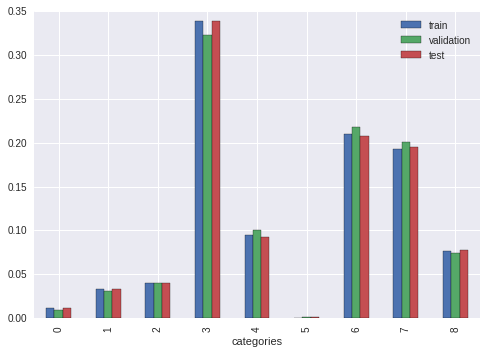

In [170]:
df.plot(x="categories",y=["train","validation","test"], kind="bar")
plt.show()

## Deeplearning modele

In [175]:
from keras import models
from keras import layers
from keras.optimizers import SGD

In [174]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(174,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

In [201]:
from keras.optimizers import RMSprop

In [209]:
opt = RMSprop(lr=0.1, decay=1e-6)

In [210]:
model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [211]:
# validation
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(X_val,y_val))

Train on 46477 samples, validate on 5165 samples
Epoch 1/10
46477/46477 [==============================] - 1s - loss: 10.5038 - acc: 0.3339 - val_loss: 10.7600 - val_acc: 0.3177
Epoch 2/10
46477/46477 [==============================] - 1s - loss: 10.5038 - acc: 0.3339 - val_loss: 10.7600 - val_acc: 0.3177
Epoch 3/10
46477/46477 [==============================] - 1s - loss: 10.5038 - acc: 0.3339 - val_loss: 10.7600 - val_acc: 0.3177
Epoch 4/10
46477/46477 [==============================] - 1s - loss: 10.5038 - acc: 0.3339 - val_loss: 10.7600 - val_acc: 0.3177
Epoch 5/10
46477/46477 [==============================] - 1s - loss: 10.5038 - acc: 0.3339 - val_loss: 10.7600 - val_acc: 0.3177
Epoch 6/10
46477/46477 [==============================] - 1s - loss: 10.5038 - acc: 0.3339 - val_loss: 10.7600 - val_acc: 0.3177
Epoch 7/10
46477/46477 [==============================] - 1s - loss: 10.5038 - acc: 0.3339 - val_loss: 10.7600 - val_acc: 0.3177
Epoch 8/10
46477/46477 [========================

## Clustering

In [219]:
train_cat = [np.argmax(x) for x in y_train] 

In [221]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sim = cosine_similarity(X_train)